## US_Births

- **Topic** : You have been hired as a consultant at JewelHeart, a new company whose mission is to create affordable and ethically-sourced fine jewelry.
Your employer noticed a recent trend in the accessory industry towards zodiac-themed jewelry, and would like to add something new to the market. After a bit of research, the team discovered that the `day of the week` that you are born actually corresponds to a `visible celestial body`. They decide to create a ring associated with each birth day.

| Day of Week        | Celestial Body|
| ------------- |:-------------:|
| Monday      | Moon |
| Tuesday      | Mars      |
| Wednesday | Mercury     |
| Thursday | Jupiter     |
| Friday | Venus     |
| Saturday | Saturn     |
| Sunday | Sun     |


The thing is, they need your help to figure out how many rings for each day of the week to make! Are there more people born on a Monday? Will there, therefore, be a greater demand for moon rings? Who knows! Luckily, you have access to `birth data in the United States`.

 

























- **Data Description** : U.S. births data for the years 1960-1989.
- **Header** - Definition:
    - year : Year
    - month : Month
    - day : Day
    - gender : Female, Male
    - births : Number of births

- **Target** : Based on this document, we will need to figure out the number of births for each day of the week from 1960-1989.
- **Instructions** : This task involves a little bit of `data cleaning` and a little bit of `linear algebra`. You will also need to process the  `to_datetim`e  function in order to transform data into  `datetime` objects.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn
import os
from datetime import datetime
from dateutil.parser import parse
import pandas as pd

# Reading and Cleaning Data


In [44]:
data = pd.read_csv('births.csv')
df = pd.DataFrame(data)
df.head(5)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [45]:
df.shape

(15547, 5)

In [46]:
df = df.dropna()
df.drop_duplicates()
df.shape

(15067, 5)

 <font color='red'>

 - Change type of column `day` : from float to int
 </font>

In [47]:
df["day"] = df["day"].astype(int)
df.head(2)

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440


 <font color='red'>

- `to_datetime` : function in order to transform `df` into `datetime` objects.
 </font>

In [48]:
df['date'] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str) + '-' + df.day.astype(str), errors='coerce')
df.head(5)

,year,month,day,gender,births,date
0,1969,1,1,F,4046,1969-01-01
1,1969,1,1,M,4440,1969-01-01
2,1969,1,2,F,4454,1969-01-02
3,1969,1,2,M,4548,1969-01-02
4,1969,1,3,F,4548,1969-01-03


In [49]:
# Check a dataframe summary and types of data stored in each column
# It seems they are all stored as integers, so no changes are necessary
df.describe()

,year,month,day,births
count,15067.000000,15067.000000,15067.000000,15067.000000
mean,1978.417402,6.516427,17.769894,4678.631513
std,5.762018,3.449554,15.284034,1003.104707
min,1969.000000,1.000000,1.000000,1.000000
25%,1973.000000,4.000000,8.000000,4344.000000
50%,1978.000000,7.000000,16.000000,4785.000000
75%,1983.000000,10.000000,24.000000,5247.000000
max,1988.000000,12.000000,99.000000,6527.000000


# Group the data by month

### In which days (of the month) most and less people were born?


In [55]:
births_month = df.groupby("month")
births_month.describe()

print(births_month['births'].sum())
print(max(births_month['births'].sum()))
print(min(births_month['births'].sum()))

month
1     5759568
2     5363417
3     5868651
4     5561317
5     5785602
6     5759233
7     6220777
8     6310276
9     6206785
10    6056193
11    5696035
12    5905087
Name: births, dtype: int64
6310276
5363417


#  Histogram with total number of births per month :
 

Text(0.5,0,u'month')

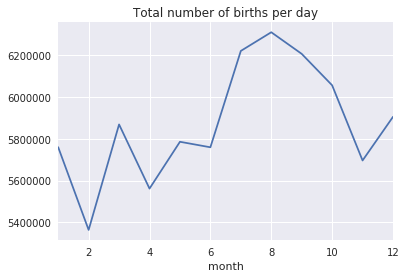

In [56]:
sns.set_style("darkgrid")
births_month['births'].sum().plot()
plt.title("Total number of births per day")
plt.xlabel("month")

# Histogram with total number of births per day of month :

In [58]:
births_day = df.groupby("day")
births_day.describe()

print(births_day['births'].sum())
print(max(births_day['births'].sum()))
print(min(births_day['births'].sum()))

day
1     2286854
2     2303168
3     2309087
4     2286588
5     2296951
6     2308073
7     2314081
8     2322376
9     2315055
10    2327197
11    2319561
12    2322956
13    2290896
14    2335551
15    2333426
16    2332456
17    2335458
18    2334949
19    2331183
20    2337631
21    2329563
22    2317711
23    2305174
24    2290500
25    2283975
26    2300208
27    2314088
28    2328630
29    2189278
30    2141788
31    1342126
99       6403
Name: births, dtype: int64
2337631
6403


Text(0.5,0,u'Day')

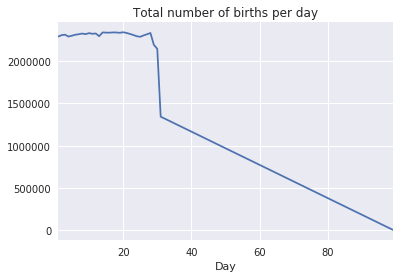

In [60]:
sns.set_style("darkgrid")
births_day['births'].sum().plot()
plt.title("Total number of births per day")
plt.xlabel("Day")

# Histogram with total number of births per year :

In [61]:
births_year = df.groupby("year")
births_year.describe()
print(births_year['births'].sum())
print(max(births_year['births'].sum()))
print(min(births_year['births'].sum()))


year
1969    3600206
1970    3737800
1971    3563548
1972    3266235
1973    3146125
1974    3170631
1975    3153556
1976    3176476
1977    3332159
1978    3338300
1979    3499795
1980    3617981
1981    3635515
1982    3685457
1983    3642821
1984    3673568
1985    3765064
1986    3760695
1987    3813216
1988    3913793
Name: births, dtype: int64
3913793
3146125


Text(0.5,0,u'Year')

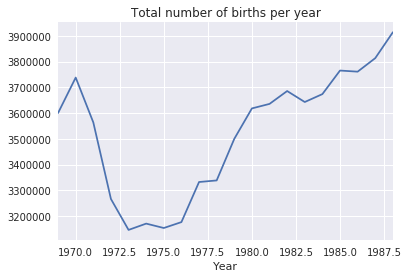

In [62]:
# Plot the total number of births per year

sns.set_style("darkgrid")
births_year['births'].sum().plot()
plt.title("Total number of births per year")
plt.xlabel("Year")